# Superconductivity Critical Tempurature Regression

Matthew Karnes

February 2020

This project was completed on its own as an effort to practice and refine necessary skills.

The Critical Tempurature of a Superconductor is the temperature at which the conductivity of a superconductor tends towards infinity. The dataset I will work with from Hamidieh, Kam, "A data-driven statistical model for predicting the critical temperature of a superconductor", Computational Materials Science, Volume 154, November 2018, Pages 346-354, lists various properties of superconductors and their critical temperatures. Each feature other than the critical temperature has both a weighted and non-weighted version and this is where the experiment will begin. I will determine whether just the weighted data, non-weighted data, or all of the data will lead to the best model, as well as determine the best type of model to predict the critical temperature.

# Implementation

I begin by importing the necessary modules.  I will be using Pandas and Numpy to manipulate and investigate the dataset and Matplotlib and Seaborn to visualize the data.  Model building will be handled by Scikit-Learn and I will try five different model types in an attempt to find the simplest, but most effective model.  

In [20]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

#Splitting data into training and testing
from sklearn.model_selection import train_test_split

#Scaling values
from sklearn.preprocessing import MinMaxScaler

#Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

Early data analysis tells that I have a dataframe that contains 82 features, 1 being the critical tempurature in units of degrees of Kelvin and 81 features to be used as predictors.  There are also 21262 entries giving a healthy amount of data to work with.

In [2]:
df = pd.read_csv(r"train.csv")

df.head(5)

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  wtd_std_atomic_mass  mean_fie  wtd_mean_fie   gmean_fie  \
0        51.968828            53.622535   775.425   1010.268571  718.152900   
1        47.094633            53.979870   766.440   1010.612857  720.605511   
2        51.968828            53.656268   775.425   1010.820000  718.152900   
3        51.968828            53.639405   775.425   1010.544286  718.152900   
4        51.968828            53.588771   775.425   1009.717143  718.152900   

   wtd_gmean_fie  entropy_fie  wtd_entropy_fie  range_fie  wtd_range_fie  \
0     938.016780     1.305967         0.791488      810.6     735.985714   
1     938.745413     1.544145         0.807078      810.6     743.164286   
2     939.009036     1.305967         0.773620      810.6     743.164286   
3     938.512777     1.305967         0.783207      810.6     739.575000   
4     937.025573     1.305967         0.805230      810.6     728.807143   

      std_fie  wtd_std_fie  mean_atomic_radius  wtd_mean_atomic_radius  \
0  323.811808   355.562967              160.25              105.514286   
1  290.183029   354.963511              161.20              104.971429   
2  323.811808   354.804183              160.25              104.685714   
3  323.811808   355.183884              160.25              105.100000   
4  323.811808   356.319281              160.25              106.342857   

   gmean_atomic_radius  wtd_gmean_atomic_radius  entropy_atomic_radius  \
0           136.126003                84.528423               1.259244   
1           141.465215                84.370167               1.508328   
2           136.126003                84.214573               1.259244   
3           136.126003                84.371352               1.259244   
4           136.126003                84.843442               1.259244   

   wtd_entropy_atomic_radius  range_atomic_radius  wtd_range_atomic_radius  \
0                   1.207040                  205                42.914286   
1                   1.204115                  205                50.571429   
2                   1.132547                  205                49.314286   
3                   1.173033                  205                46.114286   
4                   1.261194                  205                36.514286   

   std_atomic_radius  wtd_std_atomic_radius  mean_Density  wtd_mean_Density  \
0          75.237540              69.235569    4654.35725       2961.502286   
1          67.321319              68.008817    5821.48580       3021.016571   
2          75.237540              67.797712    4654.35725       2999.159429   
3          75.237540              68.521665    4654.35725       2980.330857   
4          75.237540              70.634448    4654.35725       2923.845143   

   g

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
number_of_elements                 21263 non-null int64
mean_atomic_mass                   21263 non-null float64
wtd_mean_atomic_mass               21263 non-null float64
gmean_atomic_mass                  21263 non-null float64
wtd_gmean_atomic_mass              21263 non-null float64
entropy_atomic_mass                21263 non-null float64
wtd_entropy_atomic_mass            21263 non-null float64
range_atomic_mass                  21263 non-null float64
wtd_range_atomic_mass              21263 non-null float64
std_atomic_mass                    21263 non-null float64
wtd_std_atomic_mass                21263 non-null float64
mean_fie                           21263 non-null float64
wtd_mean_fie                       21263 non-null float64
gmean_fie                          21263 non-null float64
wtd_gmean_fie                      21263 non-null float64
entropy_fie            

From a cursory look at the statistics of the features I can see that the majority of the features have relatively normal distributions with some having a positive skew such as in "wtd_mean_atomic_mass" and "gmean_ThermalConductivity".  While I could attempt to allieviate some of the skewness by log transforming the most skewed features, I for now leave them as I am more interested in seeing what features lead to the best model.  Once I determine the best data balance I could then log transform to find better results but for now I will not do so.   

In [12]:
print(df.describe())

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21263.000000      21263.000000          21263.000000   
mean             4.115224         87.557631             72.988310   
std              1.439295         29.676497             33.490406   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.458076             52.143839   
50%              4.000000         84.922750             60.696571   
75%              5.000000        100.404410             86.103540   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21263.000000           21263.000000         21263.000000   
mean           71.290627              58.539916             1.165608   
std            31.030272              36.651067             0.364930   
min             5.320573               1.960849             0.000000   
25%            58.041225 

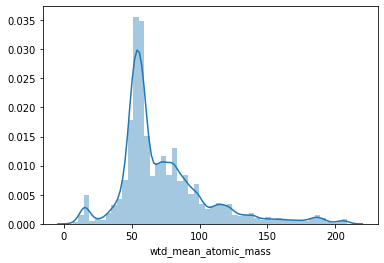

In [5]:
sns.distplot(df.wtd_mean_atomic_mass)

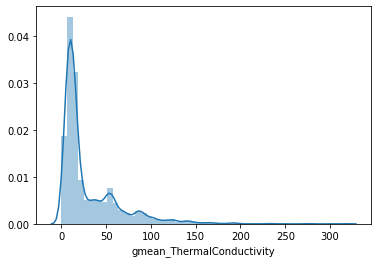

In [30]:
sns.distplot(df.gmean_ThermalConductivity)

As an exercise I will look at the correlations between the various features that describe the atomic mass of the elements the dataset describes.  

It can be seen that the greatest correlations tend to happen between a feature and its weighted version.  This could mean that the features are collinear and using only weighted or non-weighted features may lead to a more accurate model than using all together.  

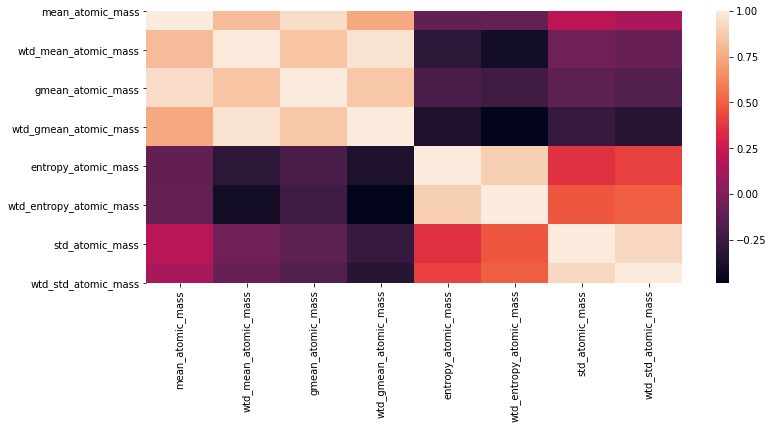

In [7]:
atomic_mass = df[["mean_atomic_mass", "wtd_mean_atomic_mass", "gmean_atomic_mass", "wtd_gmean_atomic_mass", "entropy_atomic_mass",	      "wtd_entropy_atomic_mass", "std_atomic_mass", "wtd_std_atomic_mass"]]

mass_corr = atomic_mass.corr()

plt.figure(figsize = (12, 5))
sns.heatmap(mass_corr)

Another example of the collinearity that may exist is this graph below of the "std_Valence" vs "wtd_std_Valence".  It can be seen that there is a linear relationship between the two, but it most likely not severe enough for one or the other to be removed.  The difference that removing one makes will need to be tested.

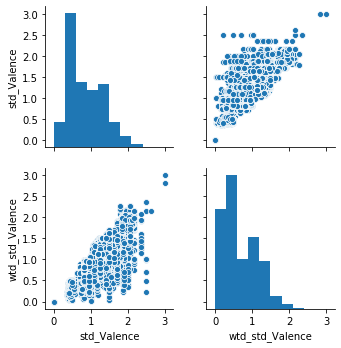

In [11]:
valence =df[["std_Valence", "wtd_std_Valence"]]

sns.pairplot(valence)

I now find the features that have the greatest positive and negative correlation with the target feature, critical temperature.  

As it turns out there are many incredibly strong correlations between the features and the target.  Interestingly the correlations between the weighted and non-weighted features are nearly identical which could be another indicator of the fact that collinearity exists between the two sets.  However, having the extra data could be invaluable to the model so testing is the only way to determine what is the best dataset to use. 

In [9]:
#Find all correlations and sort 
correlations = df.corr()["critical_temp"].sort_values()

#Print the most negative correlations
print(correlations.head(15), '\n')

#Print the most positive correlations
print(correlations.tail(15))

wtd_mean_Valence            -0.632401
wtd_gmean_Valence           -0.615653
mean_Valence                -0.600085
gmean_Valence               -0.573068
gmean_Density               -0.541684
wtd_gmean_Density           -0.540046
wtd_range_Valence           -0.439901
wtd_mean_Density            -0.433940
wtd_gmean_FusionHeat        -0.432365
gmean_FusionHeat            -0.431795
wtd_gmean_atomic_radius     -0.405176
wtd_mean_FusionHeat         -0.394117
gmean_ThermalConductivity   -0.387192
mean_FusionHeat             -0.385509
gmean_ElectronAffinity      -0.380568
Name: critical_temp, dtype: float64 

wtd_entropy_FusionHeat         0.563244
entropy_fie                    0.567817
wtd_std_fie                    0.582013
wtd_entropy_Valence            0.589664
entropy_Valence                0.598591
wtd_std_atomic_radius          0.599199
range_fie                      0.600790
number_of_elements             0.601069
wtd_entropy_atomic_radius      0.603494
wtd_entropy_atomic_mass        0

I will do a quick check to make sure that I do not have any missing values in the dataframe.

In [12]:
#Function to calculate missing values by column
def missing_values_table(df):
        #Total missing values
        mis_val = df.isnull().sum()
        
        #Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        #Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        #Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        #Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        #Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
missing_values_table(df)

Your selected dataframe has 82 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

I now going to split the dataset into three separate dataframes, one containing only the non-weighted features, one with only weighted features, and one containing all of the features minus the target.

In [3]:
#Split the data into a dataframe of only non_weighted samples and split into test and train dataframes

non_weighted = df.drop(df.filter(like='wtd',axis=1).columns,axis=1)
non_weighted_temps = pd.DataFrame(df["critical_temp"])

non_weighted = non_weighted.drop(columns="critical_temp")
print(non_weighted.shape)
print(non_weighted_temps.shape)

(21263, 41)
(21263, 1)


In [4]:
#Split the data into a dataframe of only weighted samples and split into test and train dataframes

weighted = df.filter(like = "wtd", axis=1)
weighted_temps = pd.DataFrame(df["critical_temp"])

print(weighted.shape)
print(weighted_temps.shape)

(21263, 40)
(21263, 1)


In [5]:
#Create a train and test set of all samples

all_data = df.drop(columns="critical_temp")
temps = pd.DataFrame(df["critical_temp"])

print(all_data.shape)
print(temps.shape)

(21263, 81)
(21263, 1)


Then I split those dataframes into train and test splits, on a split of 70% to 30%.

In [6]:
#Split non_weighted into 70% training and 30% testing set
X_non_weighted, X_non_weighted_test, y_non_weighted, y_non_weighted_test = train_test_split(non_weighted, non_weighted_temps, test_size = 0.3, random_state = 41)

print(X_non_weighted.shape)
print(X_non_weighted_test.shape)
print(y_non_weighted.shape)
print(y_non_weighted_test.shape)


(14884, 41)
(6379, 41)
(14884, 1)
(6379, 1)


In [7]:
#Split weighted into 70% training and 30% testing set
X_weighted, X_weighted_test, y_weighted, y_weighted_test = train_test_split(weighted, weighted_temps, test_size = 0.3, random_state = 42)

print(X_weighted.shape)
print(X_weighted_test.shape)
print(y_weighted.shape)
print(y_weighted_test.shape)


(14884, 40)
(6379, 40)
(14884, 1)
(6379, 1)


In [8]:
#Split complete data set into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(all_data, temps, test_size = 0.3, random_state = 43)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(14884, 81)
(6379, 81)
(14884, 1)
(6379, 1)


Now I define a metric on which to judge the models and get a baseline measurement.  The baseline returns a median critical tempurature of 20K and has a mean absolute error of 27.2538K.

In [9]:
#Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [10]:
#Make a baseline prediction.

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 20.00
Baseline Performance on the test set: MAE = 27.2538


Since the dataset is missing no values there is no need to impute. I will be scaling the data though as there are several different units used amongst the features and we will be using models sensitive to this such as k-Nearest Neighbors.

In [13]:
#As I will be testing on various models it is best practice to scale the data
#I will use the sklearn MinMaxScaler
#First on the weighted non_weighted sets

# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

#Fit on the training data
scaler.fit(X_non_weighted)

#Transform both the training and testing data
X_non_weighted = scaler.transform(X_non_weighted)
X_non_weighted_test = scaler.transform(X_non_weighted_test)

In [14]:
#Next the weighted data
#Fit on the training data
scaler.fit(X_weighted)

#Transform both the training and testing data
X_weighted = scaler.transform(X_weighted)
X_weighted_test = scaler.transform(X_weighted_test)

In [15]:
#Finally the complete dataset
#Fit on the training data
scaler.fit(X)

#Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [16]:
#Convert all of the training labels to 1D arrays
y_non_weighted = np.array(y_non_weighted).reshape((-1, ))
y_non_weighted_test = np.array(y_non_weighted_test).reshape((-1, ))

y_weighted = np.array(y_weighted).reshape((-1, ))
y_weighted_test = np.array(y_weighted_test).reshape((-1, ))

y = np.array(y).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

I define a function so that I can easily train all of the models and have the metric returned.  I will be using the Mean Absolute Error as the main metric of accuracy.  I am using only one metric for now for readability and so that I do not have to juggle various metrics to try and find one that works "best".  

In [17]:
#Create a function to easily train each model to be used and return the Mean Absolute Error

#Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model, X, y, X_test, y_test):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

# Model Building

I work with five different models which are:

- Linear Regression
- Support Vector Regression
- Random Forest Regression
- Gradient Boosted Regression
- k-Nearest Neighbors

Each model will be run three times for each dataset created.  I then determine the most accuracte model and dataset from these tests. These comparisons are only a baseline as some of these models will give much better results when optimized.  However, optimization takes time that would be better spent on other tasks.  As such, I will work with unoptimized models and then optimize the best performing model.

The first dataset I will create models for is the dataframe which contains only the non-weighted features.  

In [18]:
lr = LinearRegression()
lr_mae_non = fit_and_evaluate(lr, X_non_weighted, y_non_weighted, X_non_weighted_test, y_non_weighted_test)

print("Linear Regression performance for non-weighted was: MAE =", lr_mae_non)

Linear Regression performance for non-weighted was: MAE = 15.834829444640292


In [21]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae_non = fit_and_evaluate(svm, X_non_weighted, y_non_weighted, X_non_weighted_test, y_non_weighted_test)

print("SVM performance for non_weighted was: MAE =", svm_mae_non)

SVM performance for non_weighted was: MAE = 10.176988717509714


In [16]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae_non = fit_and_evaluate(random_forest, X_non_weighted, y_non_weighted, X_non_weighted_test, y_non_weighted_test)

print("Random Forest performance for non_weighted was: MAE =",random_forest_mae_non)

Random Forest performance for non_weighted was: MAE = 8.205304308028454


In [24]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae_non = fit_and_evaluate(gradient_boosted, X_non_weighted, y_non_weighted, X_non_weighted_test, y_non_weighted_test)

print("Gradient Boosted performance for non_weighted was: MAE =", gradient_boosted_mae_non)

Gradient Boosted performance for non_weighted was: MAE = 10.106492176989113


In [27]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae_non = fit_and_evaluate(knn, X_non_weighted, y_non_weighted, X_non_weighted_test, y_non_weighted_test)

print("K Nearest Neighbors performance for non_weighted was: MAE =", knn_mae_non )

K Nearest Neighbors performance for non_weighted was: MAE = 9.095150107697132


As can be seen from the graph below the best model for this dataframe was the Random Forest Regressor which beat out the k_Nearest Neighbors by approximately 1K.  The kNN model could possibly be optimized to lower the MAE even more by trying different numbers of neighbors but for now I will go with the Random Forest Regressor as the winner of this trial.

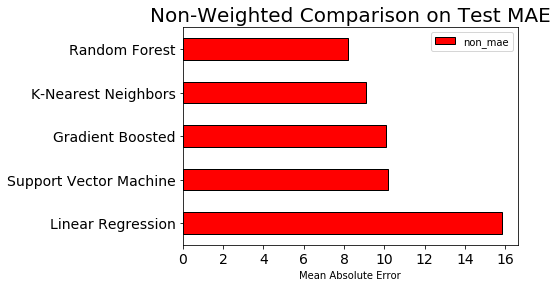

In [60]:
non_comparison = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosted",
                                            "K-Nearest Neighbors"],
                                 "non_mae" :[lr_mae_non, svm_mae_non, random_forest_mae_non, gradient_boosted_mae_non, knn_mae_non]})

non_comparison.sort_values("non_mae", ascending = False).plot(x = "model", y = "non_mae", kind = "barh",
                                                           color = "red", edgecolor = "black")

plt.ylabel(""); plt.yticks(size = 14); plt.xlabel("Mean Absolute Error"); plt.xticks(size = 14)
plt.title("Non-Weighted Comparison on Test MAE", size = 20);

Next, is the dataframe that contains the dataset of only the weighted values.

In [30]:
lr_mae_weight = fit_and_evaluate(lr, X_weighted, y_weighted, X_weighted_test, y_weighted_test)

print("Linear Regression performance for weighted was: MAE =", lr_mae_weight)

Linear Regression performance for weighted was: MAE = 14.431453737078254


In [22]:
svm_mae_weight = fit_and_evaluate(svm, X_weighted, y_weighted, X_weighted_test, y_weighted_test)

print("SVM performance for weighted was: MAE =", svm_mae_weight)

SVM performance for weighted was: MAE = 9.325947560291862


In [17]:
random_forest_mae_weight = fit_and_evaluate(random_forest, X_weighted, y_weighted, X_weighted_test, y_weighted_test)

print("Random Forest performance for weighted was: MAE =",random_forest_mae_weight)

Random Forest performance for weighted was: MAE = 5.719541866517856


In [25]:
gradient_boosted_mae_weight = fit_and_evaluate(gradient_boosted, X_weighted, y_weighted, X_weighted_test, y_weighted_test)

print("Gradient Boosted performance for weighted was: MAE =", gradient_boosted_mae_weight)

Gradient Boosted performance for weighted was: MAE = 9.086429257280725


In [28]:
knn_mae_weight = fit_and_evaluate(knn, X_weighted, y_weighted, X_weighted_test, y_weighted_test)

print("K Nearest Neighbors performance for weighted was: MAE =", knn_mae_weight )

K Nearest Neighbors performance for weighted was: MAE = 6.699879232481579


The most interesting take away from this specific trial is that across the board there were lower all around Mean Absolute Errors than with only the non-weighted features.  Depending on if the total dataset does better or worse I could possibly remove the non-weighted features from the dataset and have a fairly accurate model.  In this trial once again the Random Forest Regressor outperformed the other models.

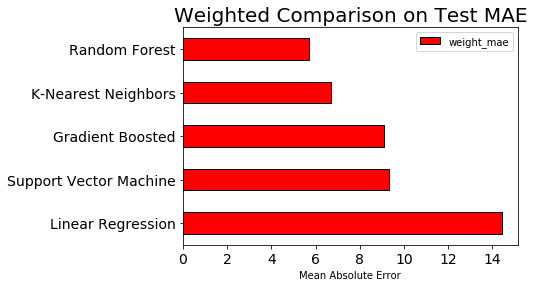

In [59]:
weighted_comparison = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosted",
                                            "K-Nearest Neighbors"],
                                 "weight_mae" :[lr_mae_weight, svm_mae_weight, random_forest_mae_weight, gradient_boosted_mae_weight, knn_mae_weight]})

weighted_comparison.sort_values("weight_mae", ascending = False).plot(x = "model", y = "weight_mae", kind = "barh",
                                                           color = "red", edgecolor = "black")

plt.ylabel(""); plt.yticks(size = 14); plt.xlabel("Mean Absolute Error"); plt.xticks(size = 14)
plt.title("Weighted Comparison on Test MAE", size = 20);

Finally I work with the entire dataset.

In [31]:
lr_mae = fit_and_evaluate(lr, X, y, X_test, y_test)

print("Linear Regression performance for total was: MAE =", lr_mae)

Linear Regression performance for total was: MAE = 13.143663162598534


In [23]:
svm_mae = fit_and_evaluate(svm, X, y, X_test, y_test)

print("SVM performance for total was: MAE =", svm_mae)

SVM performance for total was: MAE = 8.025514103705724


In [18]:
random_forest_mae = fit_and_evaluate(random_forest, X, y, X_test, y_test)

print("Random Forest performance for total was: MAE =",random_forest_mae)

Random Forest performance for total was: MAE = 5.511108555709257


In [29]:
gradient_boosted_mae = fit_and_evaluate(gradient_boosted, X, y, X_test, y_test)

print("Gradient Boosted performance for total was: MAE =", gradient_boosted_mae)

Gradient Boosted performance for total was: MAE = 8.422269618148286


In [46]:
knn_mae = fit_and_evaluate(knn, X, y, X_test, y_test)

print("K Nearest Neighbors performance for total was: MAE =", knn_mae )

K Nearest Neighbors performance for total was: MAE = 6.792974480012541


Once again the Random Forest Regressor has placed first amongst the models tested and as such that is the model that I will be moving forward with for the final optimized model.  Of note is the fact that the total dataset performed better than the non-weighted dataset and the weighted dataset if only barely.  This tells that the model benefits from the added data of having the entire dataset to work with and that if I were to need to remove features for some reason then we would start with the non-weighted features.   

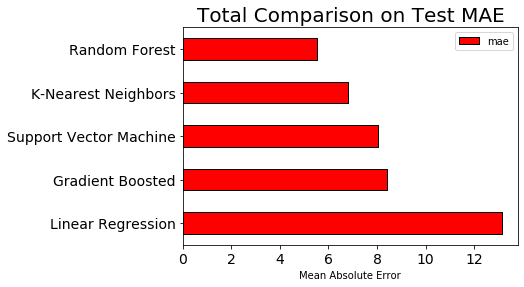

In [57]:
total_comparison = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosted",
                                            "K-Nearest Neighbors"],
                                 "mae":[lr_mae, svm_mae, random_forest_mae, gradient_boosted_mae, knn_mae]})

total_comparison.sort_values("mae", ascending = False).plot(x = "model", y = "mae", kind = "barh",
                                                           color = "red", edgecolor = "black")

plt.ylabel(""); plt.yticks(size = 14); plt.xlabel("Mean Absolute Error"); plt.xticks(size = 14)
plt.title("Total Comparison on Test MAE", size = 20);

This next chart shows clearly that the entire dataset does perform the best but only barely beats the weighted features dataset.

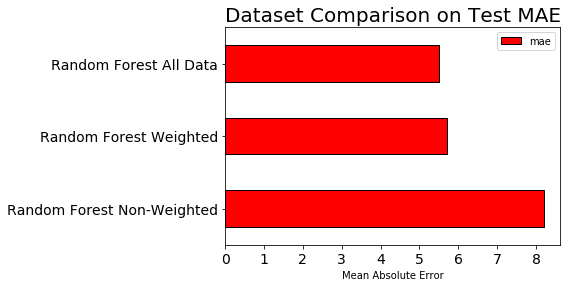

In [62]:
dataset_comparison = pd.DataFrame({"model": ["Random Forest Non-Weighted", "Random Forest All Data", "Random Forest Weighted"],
                                 "mae" :[random_forest_mae_non, random_forest_mae, random_forest_mae_weight]})

dataset_comparison.sort_values("mae", ascending = False).plot(x = "model", y = "mae", kind = "barh",
                                                           color = "red", edgecolor = "black")

plt.ylabel(""); plt.yticks(size = 14); plt.xlabel("Mean Absolute Error"); plt.xticks(size = 14)
plt.title("Dataset Comparison on Test MAE", size = 20);                             

# Optimization

I will now move forward with the entire original dataset and will optimize the random forest hyperparameters.  This will be done through the use of a RandomizedSearchCV which will provide a grid of of parameters that will be randomly mixed and tested together over 100 iterations, to find the best set of parameters for the Random Forest Regressor.  

In [19]:
#Set the parameter grid that will be optimized

#Number of trees
n_estimators = [100, 400, 700, 1000]

#Max number of features at each split
max_features = ["auto", "sqrt", "log2"]

#Max number of levels in a tree
max_depth = [10, 20, 30, 40, 50]
max_depth.append(None)

#Minimum number of samples to split a node
min_samples_split = [2, 5, 10, 15, 20]

#Minimum number of samples required at each leaf
min_samples_leaf = [1, 2, 5, 10, 15]


In [20]:
#Make a grid of parameters
param_grid = {"n_estimators": n_estimators,
              "max_features": max_features,
              "max_depth": max_depth,
              "min_samples_split": min_samples_split,
              "min_samples_leaf" : min_samples_leaf}

In [21]:
#Create a randomized search cv with the parameter grid
rf_randomcv = RandomizedSearchCV(estimator= random_forest, 
                                param_distributions = param_grid, 
                                n_iter=25, cv=4, verbose=1, 
                                random_state=42, n_jobs=-1, 
                                scoring="neg_mean_absolute_error", 
                                return_train_score=True)

I now run the RandomSearchCV to find the best parameters.

In [22]:
rf_randomcv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 52.0min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=6...


As can be seen Cross Validation of this kind can be computationally taxing as the best fit is found.  This is why Random Searches are generally preferred for large searches such as this as a normal Grid Search attempts every possible  configuration and as such is better tasked for smaller parameter changes.  Even still though this Random Search took a total of 52 minutes to run on my machine.  This number would most likely be smaller on more powerful hardware but it is still something to take into consideration. 

In [23]:
#Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(rf_randomcv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
13     421.961941      4.983475         0.755315        0.039043   
7      649.745481     17.243822         0.976438        0.138522   
12     380.136283      7.053004         0.594657        0.081399   
9       12.066298      0.229169         0.143167        0.008462   
20      49.074732      1.597600         0.619394        0.060199   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
13                400                       2                      1   
7                 700                       2                      2   
12                400                       5                      2   
9                 100                       5                      1   
20                400                       2                      2   

   param_max_features param_max_depth  \
13               auto              40   
7                auto              20   
12               auto              50   
9                sqrt              40   
20               sqrt              30   

                                               params  split0_test_score  \
13  {'n_estimators': 400, 'min_samples_split': 2, ...          -5.655130   
7   {'n_estimators': 700, 'min_samples_split': 2, ...          -5.713816   
12  {'n_estimators': 400, 'min_samples_split': 5, ...          -5.735237   
9   {'n_estimators': 100, 'min_samples_split': 5, ...          -5.768293   
20  {'n_estimators': 400, 'min_samples_split': 2, ...          -5.772424   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
13          -5.671208          -5.647886          -5.581734        -5.638989   
7           -5.710381          -5.676990          -5.637370        -5.684639   
12          -5.705744          -5.692382          -5.659500        -5.698216   
9           -5.709616          -5.716118          -5.743685        -5.734428   
20          -5.727303          -5.711320          -5.730656        -5.735426   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
13        0.034117                1           -2.636262           -2.640764   
7         0.030850                2           -2.995247           -2.987774   
12        0.027204                3           -3.006767           -3.018725   
9         0.023364                4           -3.028139           -3.024313   
20        0.022576                5           -3.185519           -3.187138   

    split2_train_score  split3_train_score  mean_train_score  std_train_score  
13           -2.657753           -2.648362         -2.645785         0.008151  
7            -3.005135           -2.993981         -2.995534         0.006223  
12           -3.023835           -3.021897         -3.017806         0.006629  
9            -3.061571           -3.031605         -3.036407         0.014756  
20           -3.188924           -3.185854         -3.186858         0.001337

In [24]:
#Print the best parameters of the model.
print(rf_randomcv.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=60, verbose=0,
                      warm_start=False)


I now run both a baseline RandomForest and the new optimized RandomForest and time them in order to determine the benefits and detriments of optimization.

In [25]:
#create a baseline RandomForest and the new optimized RandomForest for comparison.
default_model = RandomForestRegressor(random_state= 60)

final_model = rf_randomcv.best_estimator_

final_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=60, verbose=0,
                      warm_start=False)

In [26]:
%%timeit -n 1 -r 5
default_model.fit(X, y)

6.57 s ± 162 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [27]:
%%timeit -n 1 -r 5
final_model.fit(X, y)

4min 15s ± 2.12 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


As seen above the optimizied model took a full 4 minutes longer to fit than the unoptimized version! This is definitely something to keep in mind for the future.

In [41]:
#Test the two models predictions against each other.
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print("Default model performance on the test set: MAE = ", mae(y_test, default_pred))
print("Final model performance on the test set:   MAE = ", mae(y_test, final_pred))

Default model performance on the test set: MAE =  5.511108555709257
Final model performance on the test set:   MAE =  5.273696909694594


As seen above and below here that the optimization gives seemingly negligible increases in terms of the accuracy of the predictions.  An increase in the Mean Absolute Error of only about 0.3 and an R2 change of about 1%.  With the fact that fitting the optimized model took four minutes longer than the unoptimized in the future it may be better to use the unoptimized version.

In [43]:
from sklearn.metrics import r2_score

default_r2 = r2_score(y_test, default_pred)
final_r2 = r2_score(y_test, final_pred)

print("Default model performance on the test set: R2 = ", default_r2)
print("Final model performance on the test set:   R2 = ", final_r2)

Default model performance on the test set: R2 =  0.9163440600264604
Final model performance on the test set:   R2 =  0.9235701006920121


In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt

default_rmse = sqrt(mean_squared_error(y_test, default_pred ))
final_rmse = sqrt(mean_squared_error(y_test, final_pred))

print("Default model performance on the test set: RMSE = ", default_rmse)
print("Final model performance on the test set:   RMSE = ", final_rmse)

Default model performance on the test set: RMSE =  9.870525759920906
Final model performance on the test set:   RMSE =  9.434601004330403


I now plot the predictions of the final optimized model versus the correct data so that I can gain some insights into how the model works.  It appears that the model has the hardest time making predictions about elements that have a critical tempurature between around 50 and 100 Kelvin and as such this is where the model could most improve.  This could possibly be due to having a smaller sample size of elements with these critical tempuratures or possibly the temps in this range all have very similar features and as such the model has a harder time distinguishing between them.  

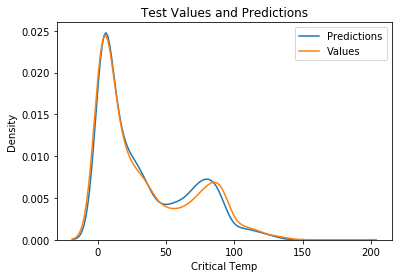

In [45]:

#Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = "Predictions")
sns.kdeplot(y_test, label = "Values")

#Label the plot
plt.xlabel("Critical Temp"); plt.ylabel("Density");
plt.title("Test Values and Predictions");

Finally, I extract the most important features to the model so that I can see what determines the model's thinking.

In [51]:

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({"feature": list(all_data.columns), 
                                "importance": final_model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values("importance", ascending = False).reset_index(drop=True)

feature_results.head(10)

feature  importance
0        range_ThermalConductivity    0.535999
1    wtd_gmean_ThermalConductivity    0.124238
2                  std_atomic_mass    0.021317
3                wtd_gmean_Valence    0.015585
4                 wtd_mean_Valence    0.014084
5                      std_Density    0.012383
6  wtd_entropy_ThermalConductivity    0.012002
7         wtd_std_ElectronAffinity    0.011334
8           gmean_ElectronAffinity    0.011198
9              range_atomic_radius    0.010825

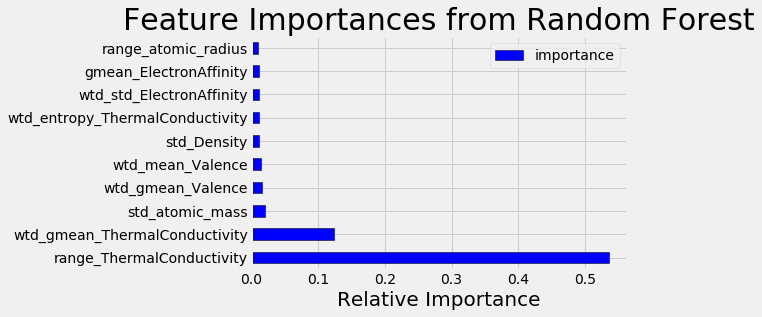

In [53]:

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);

Despite the earlier thoughts that maybe the non-weighted features hold less importance than the weighted features the most important feature is by far "range_ThermalConductivity".  In general, this tells us that the thermal conductivity of a element is extremely important to said elements Critical Tempurature followed by the elements atomic mass and Valence, which is the number of chemical bonds generally formed by the element. The feature importance drops extremely from "range_ThermalConductivity" though telling us that past these ten features I may be able to remove many of the features without affecting the models accuracy.  A dataframe that contains these ten features and only the weighted features could possibly give good results while being less complicated but only testing will determine as such.   

# Conclusions

From this project I can come to a few different conclusions:

- A Random Forest Regressor can be trained on the dataset to have an accuracy of 92% and predict with a Mean Absolute Error of around 5.  

- The total dataset provides the greatest accuracy to the model though if needed the weighted data alone provides an accurate model.

- The most important features are the "range_ThermalConductivity", "wtd_gmean_ThermalConductivity", and "std_atomic_mass".